In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
X.shape

(200, 2)

In [5]:
# 0부터 1사이 리스트2개 안에 2개로
rng.rand(2,2)

array([[0.50907757, 0.35727561],
       [0.76608347, 0.67764923]])

In [7]:
# 표준편차가 1이고 평균이 0인 표준 정규분포를 따르는 숫자를 2개 리스트 안에 200개씩
rng.randn(2, 200)

array([[-1.68755874e+00, -1.78079155e+00,  3.10432387e-01,
        -1.77600407e+00, -8.13020952e-01,  7.97672569e-01,
         1.14090912e+00, -3.84499409e-01,  7.10041699e-01,
         7.72488744e-01,  5.33135953e-01, -2.92686050e-01,
        -9.82758511e-01, -1.44702165e+00,  1.39744027e+00,
         5.03103793e-01, -1.57134056e-01, -9.24177706e-02,
         7.65631513e-01,  9.02379378e-01, -8.23523139e-02,
        -1.10099112e+00,  7.66850497e-01, -4.29593757e-01,
        -1.51791280e+00,  1.33175895e+00,  1.85229097e+00,
         3.28109778e-01, -5.65059758e-02, -1.37020556e-01,
        -3.60072288e-01, -4.85347409e-01, -8.61504359e-01,
        -8.74162046e-01, -5.95707533e-01, -1.83441318e-01,
         5.51775522e-02,  4.19068105e-01, -1.08810532e+00,
         5.51469175e-01, -1.02655964e+00, -1.06641074e+00,
         3.92739006e-01, -1.81451027e+00, -1.81156346e-01,
        -2.05520617e+00, -5.79253889e-01,  5.76007497e-01,
         7.54648002e-01, -1.17055931e+00, -1.11702363e+0

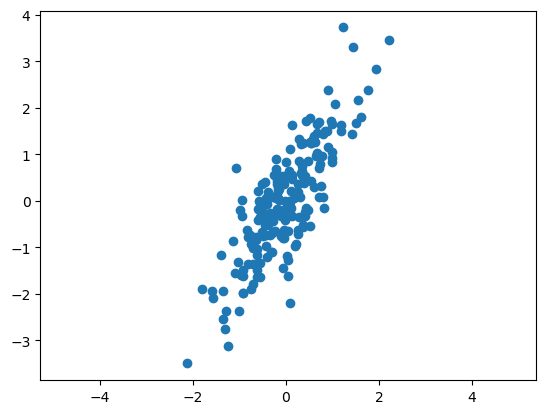

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

- fit

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=13) # n_components=2는 2개의 주성분으로 표현하라는 뜻
pca.fit(X)

PCA(n_components=2, random_state=13)

In [14]:
pca.components_ # n_components를 2로 설정해서 벡터 2개가 나옴

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [17]:
pca.explained_variance_ # 1번째, 2번째 벡터들의 설명력을 나타냄. 1번째 벡터가 설명력이 높은것을 알 수 있음

array([1.82531406, 0.13209947])

In [18]:
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [19]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(
        arrowstyle='->',
        linewidth=2,
        color='black',
        shrinkA=0,
        shrinkB=0
    )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

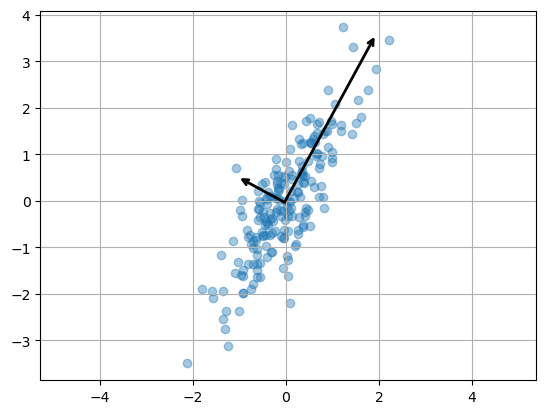

In [21]:
plt.scatter(X[:,0], X[:,1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.grid()
plt.show();

- 데이터의 주성분을 찾은 다음 주축을 변경하는 것도 가능

In [22]:
# n_components 1로
pca = PCA(n_components=1, random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [23]:
pca.components_

array([[0.47802511, 0.87834617]])

In [24]:
pca.mean_

array([-0.03360413, -0.03527382])

In [25]:
pca.explained_variance_ratio_

array([0.93251326])

In [27]:
X

array([[-1.07103225e-01, -3.31411265e-01],
       [ 3.61221011e-01,  4.12447007e-01],
       [ 7.92641186e-01,  7.83199551e-02],
       [ 1.22190326e+00,  3.72340981e+00],
       [ 1.17483182e+00,  1.62026754e+00],
       [ 3.66455040e-01, -5.23265709e-01],
       [ 8.14057485e-01, -1.46869632e-01],
       [-7.82888709e-01, -7.39292503e-01],
       [-7.05016180e-01, -1.02201438e+00],
       [-1.34957018e+00, -2.53775010e+00],
       [ 2.89674499e-02, -1.19791431e+00],
       [-1.84963913e-01, -1.83202370e-01],
       [ 6.00056811e-01,  3.03677108e-01],
       [ 3.41934464e-01,  6.48346265e-01],
       [ 7.11548542e-02, -8.29059119e-03],
       [ 1.93385201e+00,  2.83564626e+00],
       [ 3.67276222e-02, -1.26791221e+00],
       [ 1.22164133e-01,  5.59251496e-01],
       [-9.58632015e-01, -1.59689218e+00],
       [ 7.03686415e-01,  7.75747902e-02],
       [ 9.69778312e-01,  1.71544460e+00],
       [-1.30345417e+00, -2.75798682e+00],
       [-1.33857699e-01, -2.04773486e-01],
       [ 9.

In [28]:
# X 데이터를 하나의 components로 변경
X_pca = pca.transform(X)
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

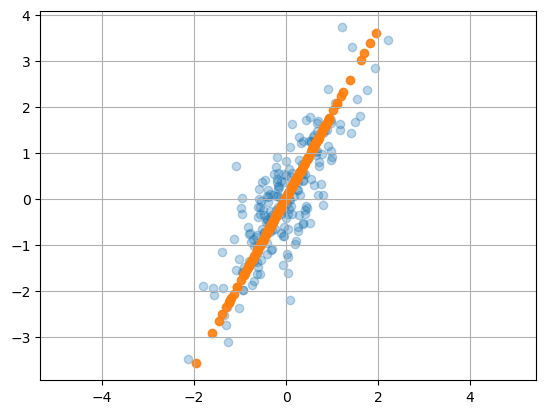

In [31]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.9)
plt.axis('equal')
plt.grid()
plt.show();

## iris

In [32]:
import pandas as pd
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [39]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [40]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [41]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [42]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [47]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [43]:
def get_pd_from_pca(pca_data, cols=['PC1', 'PC2']):
    return pd.DataFrame(pca_data, columns=cols)

In [44]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


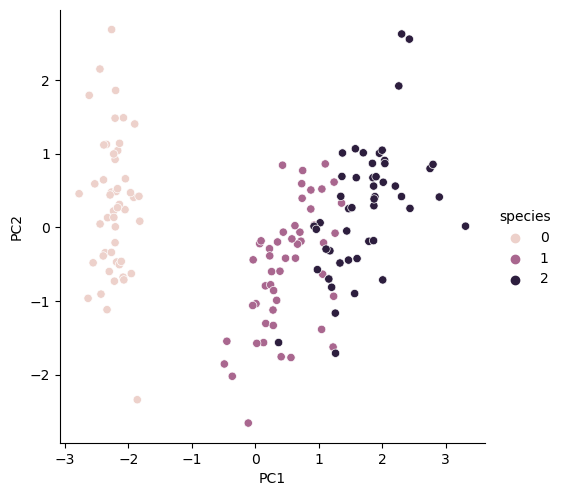

In [46]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['PC1'], y_vars=['PC2']);

- 4개 특성을 모두 사용해서 randomforest에 적용하면

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [49]:
def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

In [50]:
rf_scores(iris_ss, iris.target)

Score :  0.96


- 이번에는 두개의 특성만 가지고(pca)

In [51]:
pca_X = iris_pd_pca[['PC1', 'PC2']]
rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


- 위의 실습을 통해 특성을 줄여서도 머신러닝을 적용할 수 있다는 사실을 알았다

## wine

In [52]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [53]:
wine_X = wine.drop(['color'], axis=1)
wine_y = wine['color']

In [54]:
wine_ss = StandardScaler().fit_transform(wine_X)

In [55]:
def print_variance_ratio(pca):
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))

In [56]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117]
sum of variance_ratio :  0.47428342743236185


In [57]:
pca_columns = ['PC1', 'PC2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

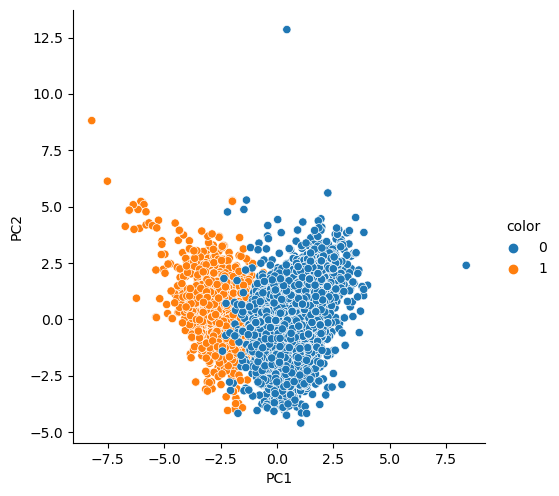

In [58]:
sns.pairplot(pca_wine_pd, hue='color', height=5, x_vars=['PC1'], y_vars=['PC2']);

In [62]:
# standardscaler적용한 데이터 randomforest score
rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


In [61]:
# pca(주성분 2개) randomforest score
pca_X = pca_wine_pd[['PC1', 'PC2']]
rf_scores(pca_X, wine_y)

Score :  0.981067803635933


In [64]:
# 주성분 3개로 변경 / 61까지 높아짐
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio :  0.6110756621838705


In [65]:
pca_columns = ['PC1', 'PC2', 'PC3']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

In [66]:
pca_X = pca_wine_pd[pca_columns]
rf_scores(pca_X, wine_y)

Score :  0.9832236631728548


In [67]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values

In [71]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='PC1', y='PC2', z='PC3', color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()